<a href="https://colab.research.google.com/github/sahug/python-data-structure/blob/main/Data%20Structure%20-%20Linked%20List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science Basics - Linked List**

**Node Class** - Represents Each Individual Element in a Linked List

**Important Notes:**

- **Node()** - Create New Elements
- **self.head** - Gives the head of the Linked List
- **self.head.next** - Gives the next element from the head of the Linked List.
- **self.head.next.next**  - Gives next to next element from the head and so on.
- **self.head.data** - Gives the value of the head of the Linked List.


In [1]:
# Has an element and the pointer to next element
# Data can contain integer, alphabets or complex objects
class Node:
  def __init__(self, data=None, next=None):
    self.data = data
    self.next = next

In [2]:
node = Node(1, None)
print(node)
print(node.data)
print(node.next)

1
None


**Linked List** - Has **Head** variable, a pointer to the head of the Linked List

In [3]:
class LinkedList:

  def __init__(self):
    # Points to the head of the linked list    
    self.head = None

  # Method to insert at the begning of the LinkedList
  def insert_at_begening(self, data):
    # Assume there is already elements and we are adding in front of the first element
    # Call Node to represent this element    
    # data - Element we are adding
    # next - Next element will be the current head, existing 1st element a.k.a. current head. 
    # The current head before adding the new element is the first element. After adding the new element this head will become the next element.
    node = Node(data=data, next=self.head) 

    # The new element becomes the new head. 
    self.head = node


  def insert_at_end(self, data):
    #If list is empty, this element becomes the first element and hence the current Head.
    if self.head is None:
      self.head = Node(data, None)
      return

    #Start iterating from Head.
    itr = self.head

    # Keep iterating util we reah the end
    while itr.next:
      itr = itr.next

    # Add the new element
    itr.next = Node(data, None)

  
  # Insert a new Linked List
  def insert_values(self, data_list):
    self.head = None
    # Adding all new element to the end one by one
    for data in data_list:
      self.insert_at_end(data) 


  # Print Length of Linked List
  def get_length(self):
    count = 0
    itr = self.head
    while itr:
      count += 1
      itr = itr.next
    return count


  # Remove Element At Index
  def remove_at(self, index):
    if index < 0 or index > self.get_length():    
      raise Exception("invalid Index")

    if index == 0:
      self.head = self.head.next
      return

    count = 0
    itr = self.head
    
    # To remove an element at particular index.
    # First we have to find the given index element's previous element
    # Point this element's previous element to the element's next element
    # When the element is removed for the link it is deleted.
    while itr:
      if count == index -1: # find the given index element's previous element
        itr.next = itr.next.next # Point this element's previous element to the element's next element
        break       
      
      itr = itr.next
      count += 1


  # Insert Element At Index
  def insert_at(self, index, data):
    if index < 0 or index > self.get_length():    
      raise Exception("invalid Index")

    if index == 0:
      self.insert_at_begening(data)      
      return

    count = 0
    itr = self.head

    # To insert an element at particular index.
    # First we have to find the element at previous index
    # Create the new element here
    # Point the previous element to this new element
    # The new element will automatically poin to next element
    
    while itr:
      if count == index - 1: # find the element at previous index
        node = Node(data, itr.next) # Create New Element
        itr.next = node # Point the previous element to this new element
        break       
      
      itr = itr.next
      count += 1


  # Insert After Value
  def insert_after_value(self, data_after, data_to_insert):  
    itr = self.head  
    while itr:
      if itr.data == data_after:
        itr = self.head 
        node = Node(data_to_insert, itr.next)
        itr.next = node
        break
      itr = itr.next
      

  # Remove by value
  def remove_by_value(self, data):
    itr = self.head
    index = 0
    while itr:
      index += 1
      if itr.data == data:
        self.remove_at(index-1)
        break
      itr = itr.next

  # Get Element By Index
  def get_element_at(self, index):
    itr = self.head
    counter = 0

    while itr:
      counter += 1
      if counter == index:
        return itr.data
      itr = itr.next


  # Get Elements from LL in a Range as a new LL
  def get_element_inclusive_in_range(self, start, end):    
    il = LinkedList()

    itr = self.head
    counter = 0

    while itr:
      counter += 1      
      if counter >= start and counter < end: 
        # Add data, Adds Head as well so repeats 1 element twice.
        il.insert_at_end(itr.data) 
      itr = itr.next

    # Delete the first element to remove duplicate
    il.remove_at(1)
    return il


  #Remove Duplicates in a Linked List
  def remove_duplicate(self):

    size = self.get_length()

    index = 1

    while index <= size:                                    
      match_count = 0
      match = self.get_element_at(index)
      itr = self.head
      while itr:            
        if match == itr.data:
          match_count += 1
          if match_count >= 2:
            self.remove_at(index - 1)
        itr = itr.next       
      index += 1


  # Print Linked List
  def print(self):    
    
    # If LL is empty 
    if self.head is None:
      print("Linked List is empty")
      return

    # If not empty we will iterate thru the list
    itr = self.head # First Element in LL

    l_l_str = ""

    while itr:
      l_l_str += str(itr.data) + "--->"
      itr = itr.next

    print(l_l_str)


  # Delete the middle Node
  def delete_middle_element(self):

    size = self.get_length()

    middle = size //2

    if (middle % 2 != 0):
      self.remove_at(middle)


  # Partition List By
  def list_partition_by(self, data):
    
    lp = LinkedList()

    # Insert the data for reference. We will remove it later.
    lp.insert_at_begening(data)

    itr =  self.head

    while itr:
      if itr.data <= data:        
        lp.insert_at_begening(itr.data)
      else:
        lp.insert_at_end(itr.data)
      itr = itr.next
    return lp


  # Split List
  def split_list(self):    
    l1 = LinkedList()
    l2 = LinkedList()

    size = self.get_length()

    middle = size // 2

    itr =  self.head
    count = 0

    while itr:
      count += 1
      if count <= middle:        
        l1.insert_at_end(itr.data)
      else:
        l2.insert_at_end(itr.data)
      itr = itr.next
    return l1, l2    


  # Sum List Nodes
  def sum_list(self):
    
    l1, l2 = self.split_list()
    i1, i2 = "", ""

    l3 = LinkedList()    

    for i in range(l1.get_length(), 0, -1):
      i1 = i1 + str(l1.get_element_at(i))

    for i in range(l2.get_length(), 0, -1):
      i2 = i2 + str(l2.get_element_at(i))

    sum = int(i1) + int(i2)

    while sum>=1:
      l3.insert_at_end(sum % 10)
      sum = sum // 10

    return l3    


  # Palindrome
  def is_palindrome(self):

    l1 = LinkedList()

    itr = self.head
    size = self.get_length()

    for i in range(self.get_length(), 0, -1):
      l1.insert_at_end(self.get_element_at(i))

    if self.get_length() == l1.get_length():
      for i in range(1, self.get_length()):
        if self.get_element_at(i) != l1.get_element_at(i):
          return False
      
    return True


  # Is Intersection
  def is_intersection(self, l1):
  
    boolean = False

    big_list = l1.get_length() if l1.get_length() >= self.get_length() else self.get_length()
    
    for i in range(1, big_list):
      if l1.get_element_at(i) == self.get_element_at(i):
        boolean = True    

    return boolean

**Insert at begening**

In [4]:
if __name__ == "__main__":
  l_l = LinkedList()
  l_l.insert_at_begening(5)
  l_l.insert_at_begening(89)
  l_l.print()

89--->5--->


**Insert a new Linked List**

In [5]:
if __name__ == "__main__":
  l_l = LinkedList()
  l_l.insert_at_begening(5)
  l_l.insert_at_begening(89)
  
  l_l.insert_values(["banana", "mango", "grapes", "orange"])
  l_l.print()

banana--->mango--->grapes--->orange--->


**Length of Linked List**

In [6]:
# Length of Linked List
if __name__ == "__main__":
  l_l = LinkedList()
  l_l.insert_at_begening(5)
  l_l.insert_at_begening(89)
  l_l.print()
  
  l_l.insert_values(["banana", "mango", "grapes", "orange"])
  print("Length : ", l_l.get_length())

89--->5--->
Length :  4


**Remove Element**

In [7]:
if __name__ == "__main__":
  l_l = LinkedList()
  l_l.insert_at_begening(5)
  l_l.insert_at_begening(89)
  l_l.insert_values(["banana", "mango", "grapes", "orange"])
  l_l.print()
  
  l_l.remove_at(2)
  l_l.print()

banana--->mango--->grapes--->orange--->
banana--->mango--->orange--->


**Insert Element At**

In [8]:
if __name__ == "__main__":
  l_l = LinkedList()
  l_l.insert_at_begening(5)
  l_l.insert_at_begening(89)
  l_l.insert_values(["banana", "mango", "grapes", "orange"])
  l_l.print()
  
  l_l.insert_at(0, "figs")
  l_l.insert_at(2, "apple")
  l_l.print()

banana--->mango--->grapes--->orange--->
figs--->banana--->apple--->mango--->grapes--->orange--->


**Insert after an element**

In [9]:
if __name__ == "__main__":
  l_l = LinkedList()
  l_l.insert_at_begening(5)
  l_l.insert_at_begening(89)
  l_l.insert_values(["banana", "mango", "grapes", "orange"])
  l_l.print()
  
  l_l.insert_after_value("banana", "papaya")
  l_l.print()

banana--->mango--->grapes--->orange--->
banana--->papaya--->mango--->grapes--->orange--->


**Remove element By Value**

In [10]:
if __name__ == "__main__":
  l_l = LinkedList()
  l_l.insert_at_begening(5)
  l_l.insert_at_begening(89)
  l_l.insert_values(["banana", "mango", "grapes", "orange"])
  l_l.print()
  
  l_l.remove_by_value("papaya")
  l_l.print()

banana--->mango--->grapes--->orange--->
banana--->mango--->grapes--->orange--->


**Get Element At I**

In [11]:
if __name__ == "__main__":
  l_l = LinkedList()
  l_l.insert_at_begening(5)
  l_l.insert_at_begening(89)
  l_l.insert_values(["banana", "mango", "grapes", "orange"])
  l_l.print()
  
  print(l_l.get_element_at(0))
  print(l_l.get_element_at(1))
  print(l_l.get_element_at(2))

banana--->mango--->grapes--->orange--->
None
banana
mango


**Get Elements in Range**

In [12]:
if __name__ == "__main__":
  l_l = LinkedList()
  l_l.insert_at_begening(5)
  l_l.insert_at_begening(89)
  l_l.insert_values(["banana", "mango", "grapes", "orange"])
  l_l.print()

  l_l.get_element_inclusive_in_range(2, 4).print()

banana--->mango--->grapes--->orange--->
mango--->


**Remove Duplicates**

In [13]:
if __name__ == "__main__":
  ll = LinkedList()
  ll.insert_at_begening(1)
  ll.insert_at_begening(2)
  ll.insert_at_begening(4)
  ll.insert_at_begening(2)
  ll.insert_at_begening(4)
  ll.insert_at_begening(3)
  l_l.print()
  
  ll.remove_duplicate()
  ll.print()

banana--->mango--->grapes--->orange--->
3--->2--->4--->1--->


**Delete Middle Node**

In [14]:
if __name__ == "__main__":
  ll = LinkedList()
  ll.insert_at_begening(1)
  ll.insert_at_begening(2)
  ll.insert_at_begening(3)
  ll.insert_at_begening(4)
  ll.insert_at_begening(5)
  ll.insert_at_begening(6)
  ll.insert_at_begening(7)
  ll.print()

  ll.delete_middle_element()
  ll.print()

7--->6--->5--->4--->3--->2--->1--->
7--->6--->5--->3--->2--->1--->


**Partition**

In [15]:
if __name__ == "__main__":
  ll = LinkedList()
  ll.insert_at_begening(5)
  ll.insert_at_begening(6)
  ll.insert_at_begening(7)
  ll.insert_at_begening(1)
  ll.insert_at_begening(2)
  ll.insert_at_begening(3)
  ll.insert_at_begening(4)  
  ll.print()

  ll.list_partition_by(5)
  ll.print()

4--->3--->2--->1--->7--->6--->5--->
4--->3--->2--->1--->7--->6--->5--->


**Split Linked List**

In [16]:
if __name__ == "__main__":
  ll = LinkedList()
  ll.insert_values([7, 1, 6, 5, 9, 2])
  ll.print()

  (ll.split_list())[0].print()
  (ll.split_list())[1].print()

7--->1--->6--->5--->9--->2--->
7--->1--->6--->
5--->9--->2--->


**Sum Lists**

In [17]:
if __name__ == "__main__":
  ll = LinkedList()
  ll.insert_values([7, 1, 6, 5, 9, 2])
  # 617 + 295 = 912, Reverse is 219
  ll.sum_list().print()

  ll = LinkedList()
  # 4321 + 8765 = 13086, Reverse is 68031
  ll.insert_values([1, 2, 3, 4, 5, 6, 7, 8])
  ll.sum_list().print()

2--->1--->9--->
6--->8--->0--->3--->1--->


**Palindrome**

In [18]:
if __name__ == "__main__":
  ll = LinkedList()

  ll.insert_values([1, 2, 3, 2, 1])  
  print(ll.is_palindrome())

  ll.insert_values([1, 2, 3, 2, 1, 4])  
  print(ll.is_palindrome())

True
False


**Intersection**

In [19]:
if __name__ == "__main__":  
  l1 = LinkedList()
  l2 = LinkedList()

  #4th Position has same index and same value
  l1.insert_values([1, 2, 3, 9, 8, 7])  
  l2.insert_values([11, 22, 13, 9, 18, 17])  
  print(l2.is_intersection(l1))

  #4th Position has same index and but different value
  l1.insert_values([1, 2, 3, 9, 8, 7])  
  l2.insert_values([11, 22, 13, 19, 18, 17])  
  print(l2.is_intersection(l1))

True
False


**Loop Detection:** Given a circular linked list, implement an algorithm that returns the node at the beginning of the loop. 

**DEFINITION** 
Circular linked list: A (corrupt) linked list in which a node's next pointer points to an earlier node, so as to make a loop in the linked list. 

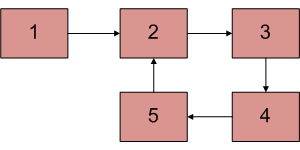

**EXAMPLE** 
```
Input: A -> B -> C -> D -> E -> C [points to the same C as earlier]

Input: A -> B -> C -> D 
                 |   -> 
                 <----E 
```

`Output: C `

**Looped Linked List**

`llist.head.next.next.next.next = llist.head`

In [20]:
class Node:
 
    # Constructor to initialize
    # the node object
    def __init__(self, data):
        self.data = data
        self.next = None
 
 
class LinkedList:
 
    # Function to initialize head
    def __init__(self):
        self.head = None
 
    # Function to insert a new
    # node at the beginning
    def push(self, new_data):
        new_node = Node(new_data)
        new_node.next = self.head
        self.head = new_node
 
    # Utility function to print it
    # the linked LinkedList
    def printList(self):
        temp = self.head
        while(temp):
            print(temp.data, end=" ")
            temp = temp.next
 
    def detectLoop(self):
        s = set()
        temp = self.head
        while (temp):
 
            # If we have already has
            # this node in hashmap it
            # means their is a cycle
            # (Because you we encountering
            # the node second time).
            if (temp in s):
                return True
 
            # If we are seeing the node for
            # the first time, insert it in hash
            s.add(temp)
 
            temp = temp.next
 
        return False
 
 
# Driver program for testing
llist = LinkedList()
llist.push(20)
llist.push(4)
llist.push(15)
llist.push(10)
 
# Create a loop for testing
llist.head.next.next.next.next = llist.head

if(llist.detectLoop()):
    print("Loop found")
else:
    print("No Loop ")

Loop found
